What we are covering:
1. Data (Prepare and load)
2. Build Model
3. Fitting the model to data (training)
4. Making predictions and evaluating a model (inference)
5. Saving and loading a model
6. Putting it all together

In [60]:
import torch
import torch.nn as nn # nn contains all the building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.6.0'

**1. Data (Prepare and load)**

Machine learning is a game of two parts:
1. Get data into a model
2. Build a model to learn patterns in the data



Creating known data using the linear regression formula, using the formula y = weight * X + bias to make a straight line with known parameters.


In [61]:
weight = 0.6
bias = 0.4

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4120],
         [0.4240],
         [0.4360],
         [0.4480],
         [0.4600],
         [0.4720],
         [0.4840],
         [0.4960],
         [0.5080]]),
 50,
 50)

*Splitting data into training and test sets*

In [62]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

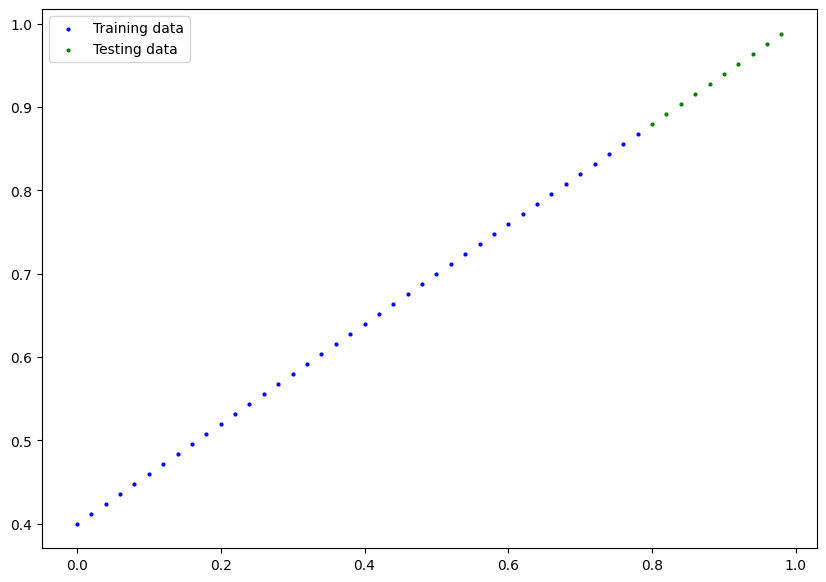

In [63]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 10})

plot_predictions()

**2. Build Model**

What our model does:
1. Starts with random values (weight and bias)
2. Looks at training data and adjusts the random values to try and match the ideal values

How does it learn? Two algorithms:
1. Gradient Descent
2. Backpropagation











In [64]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

# Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # Linear Regression Formula

# Create a random seed
torch.manual_seed(42)
        

**PyTorch Model Building Essentials**

* torch.nn - contains all the building blocks for neural networks, a neural network can be considered a computational graph
* torch.optim - contains all the optimization algorithms, helps with gradient descent
* torch.nn.Module - the base class for all neural network modules, our models should inherit from this, we should define a forward() method
* torch.nn.Parameter - a type of Tensor, that behaves like a parameter (learnable variable)
* torch.utils.data.DataLoader - helps with loading data from a dataset
* torch.utils.data.Dataset - the base class for all datasets, we need to define a __len__() and __getitem__() method
* def forward() - defines the computation in the model, this is called when we call the model in the training loop

https://pytorch.org/tutorials/beginner/ptcheat.html




*Checking the contents of our model*

We can check the parameters of our model using `.parameters()`

In [65]:
model_0 = LinearRegressionModel() # Creating an instance of the model (subclass of nn.Module)
list(model_0.parameters()) # Listing the parameters of the model

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [66]:
# List named parameters
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [67]:
weight, bias

(0.6, 0.4)

**Making predictions using `torch.inference_mode()`**

To check our model's predictions, let's see how well it predicts `y_test` based on `X_test`

In [70]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8800],
         [0.8920],
         [0.9040],
         [0.9160],
         [0.9280],
         [0.9400],
         [0.9520],
         [0.9640],
         [0.9760],
         [0.9880]]))

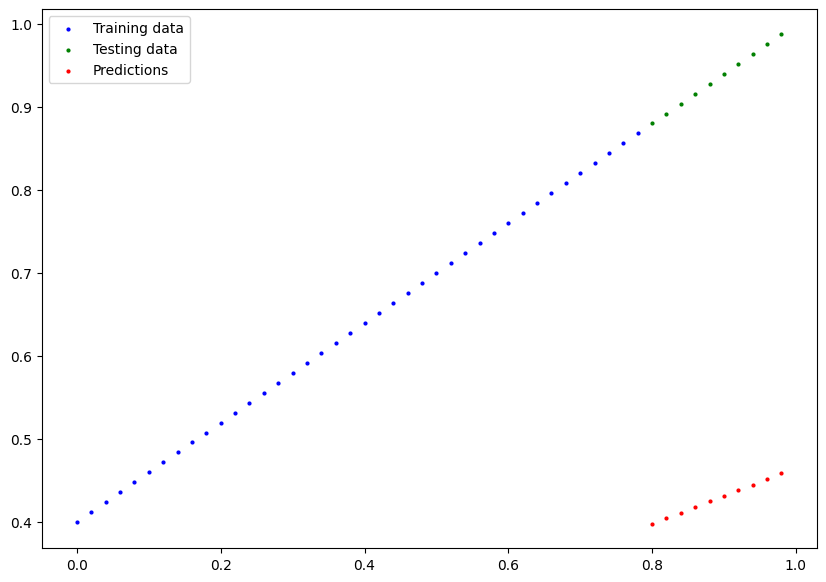

In [71]:
plot_predictions(predictions=y_preds)